KNN class exercise - pick odd number of k

the point itself is considered 

how do we choose a good K

good number of k = nearest neighbors

there are many ways to define distance

different metrics will get you different results


Manhattan distance does not have priority when distances are equal - at that point you randomly pick between equal distances

KNN can do regression and classification

can use labels to predict something

p=1 Manhattan metric

p=2 Euclidean metric (taking square, Pythagorean theorem)

## How do we measure distances? Review

### Mannathan Metric

$$ d_{M}(x,y) = \sum_{i=1}^{n}|x_i - y_i | $$  


<img src="img/taxicab.png" width=250, height=250>  

[For more on taxicab distance](https://en.wikipedia.org/wiki/Taxicab_geometry)

We can use distance function from scipy.spatial module for calculating Manhattan distance between points.

In [3]:
import numpy as np
from scipy.spatial import distance


## let's take two vectors and calculate 
## the 'taxicab' ('Manhattan') with 'distance' from scipy.spatial
## create two arbitrary vector

x = np.array([1,0,7])
y = np.array([0,3,12]) #sum the differences between each for manhattan distance

## calculate taxicab distance
dist_x_to_y = distance.cityblock(x,y)
## note that as expected the distance is symmetric
dist_y_to_x = distance.cityblock(y,x)

print('distance of x to y: {}, distance of y to x: {}'.format(dist_x_to_y, dist_y_to_x))

distance of x to y: 9, distance of y to x: 9


mathematically distance is symmetric

x to y = y to x


but in real life you have one way streets

x to y might take 5 minutes, y to x might take 15 minutes

In [5]:
## note that distance.cityblock doesn't work with 2D arrays
## try!

### Also we have good-old Euclidean distance

[Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance)

\begin{gather}
    d_{E}(x,y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^{2}} \\
    \mbox{or equivalently} \\
    d_{E}(x,y)^{2} = \sum_{i=1}^{n} (x_i - y_i)^{2}
\end{gather}

In [4]:
## let's take two vectors and calculate 
## the 'taxicab' ('Manhattan') with 'distance' from scipy.spatial
## create two arbitrary vector

x = np.array([1,0,7])
y = np.array([0,3,12])

## calculate taxicab distance
dist_x_to_y = distance.euclidean(x,y)
## note that as expected the distance is symmetric
dist_y_to_x = distance.euclidean(y,x)

print('distance of x to y: {}, distance of y to x: {}'.format(dist_x_to_y, dist_y_to_x))

distance of x to y: 5.916079783099616, distance of y to x: 5.916079783099616


In [1]:
import numpy as np
np.sqrt(1**2 + 3**2 + 5**2)

5.916079783099616

In [5]:
distance.minkowski(x, y, p=1)

9.0

## KNN algorithm for classification

<img src='img/knn-process.png' width=500/>


__!!Wait__: What happens if there is a tie?

Tie-Breakers:
1. When doing a binary classification, often use a odd K to avoid ties.
2. Multiple approaches for Multiclass problems:
    - Reduce the K by 1 to see who wins.
    - Weight the votes based on the distance of the neighbors
    
### Let's play with k parameter and see the effect of different k_values.

[The following example is from sklearn documentation](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)

In [6]:
## import necessary libraries and the dataset

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
%matplotlib inline


## import some data to play with
## for more info on the dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
iris = datasets.load_iris()

# type = kind of object, not a dataframe

In [7]:
## description of the dataset

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

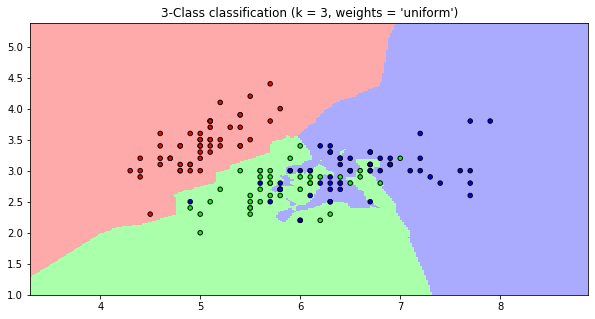

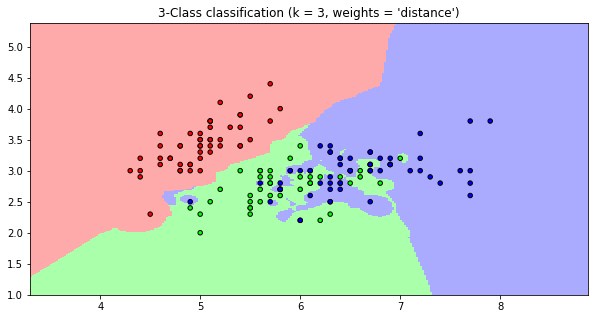

In [27]:
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

## number of neighbors
## set this value to different values to understand the effect of k
n_neighbors = 150


# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
plt.show()

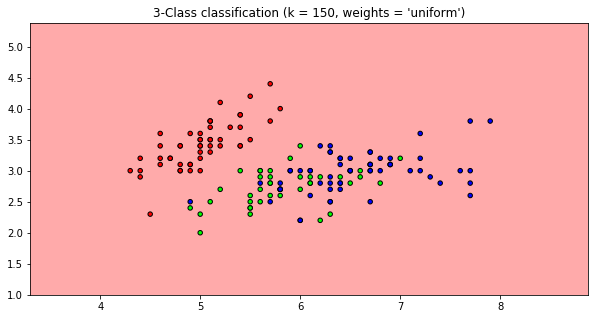

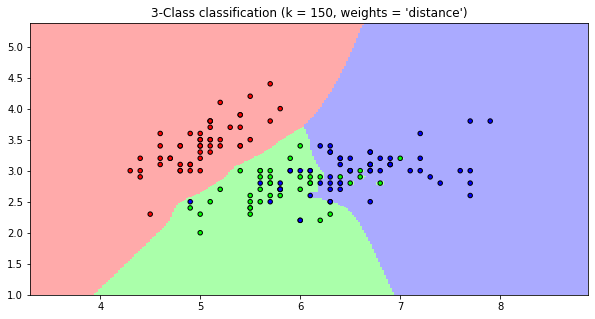

In [26]:
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

## number of neighbors
## set this value to different values to understand the effect of k
n_neighbors = 150


# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
plt.show()

**distance is not always better than uniform - depends on data & problem**

lower k has more variation

In [28]:
## let's see knn in action

import pandas as pd
diabetes = pd.read_csv('diabetes.csv')

zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes.loc[:, zero_cols].replace(0, np.NaN, inplace = True)

print(diabetes.shape)
diabetes.head()


(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
X = diabetes.drop(columns= 'Outcome').values
y = diabetes.Outcome.values.reshape(-1,1)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify = y,  test_size = 0.2)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

this is a non-parametric algorithm, meaning it doesn't learn anything, there are no parameters to learn

every time it status from scratch and does all the distance calculations again

goal is to minimize error

calculating distance is not a "learning" algorithm - sklearn keeps this metric in its mind

algorithm does not turn a k that is best value

---

KNN has weights - weights closer values more to help better classify by penalizing distance
 - uniform (all equal)
 - distance ** use this one
 - user defined 

p - where you choose eucledian or manhattan

n_jobs = number of jobs, set to 3 or 4 and it will use 3 or 4 core processors, if you put -1 it uses all core processors available to it; this cuts computation time

In [32]:
# don't forget 'defaults' are choice too!!
knn = KNeighborsClassifier(n_neighbors=3,
                           weights='uniform',
                           algorithm='auto',
                           leaf_size=30,
                           p=2,
                           metric='minkowski')

In [33]:
# let's see the cross-validation score.

from sklearn.model_selection import cross_validate

cv = cross_validate(knn, X_train, y_train, cv=3, n_jobs=-1, verbose=2, return_estimator=True)
# can add return_train_score=True

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s finished


In [34]:
test_scores_mean = cv['test_score'].mean()
test_scores_std = cv['test_score'].std()
print('test score mean is %0.3f +/- %0.3f'%(test_scores_mean, test_scores_std))

test score mean is 0.712 +/- 0.003


In [51]:
## why it doesn't return train values?
train_scores_mean = cv['train_score'].mean()
train_scores_std = cv['train_score'].std()
print('test score mean is %0.3f +/- %0.3f'%(train_scores_mean, train_scores_std))

# you didn't ask in cross validation parameter for this
# can add return_train_score=True to CV model

KeyError: 'train_score'

In [36]:
## do we need scaling?
from sklearn.preprocessing import StandardScaler

# YES we need scaling because if x and y scales are different,
# distance is distorted, need to break down to scaled units of distance

In [37]:
ss = StandardScaler()
ss.fit(X_train)
Xscaled_train = ss.transform(X_train)
Xscaled_test = ss.transform(X_test)

In [38]:
cv_scaled = cross_validate(knn, 
                           Xscaled_train, 
                           y_train, 
                           cv = 3, 
                           n_jobs= -1,
                           verbose = 2,
                           return_train_score= True,
                           return_estimator= True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [39]:
scaled_scores_mean = cv_scaled['test_score'].mean()
scaled_scores_std = cv_scaled['test_score'].std()
print('test score mean is %0.3f +/- %0.3f'%(scaled_scores_mean, scaled_scores_std))

test score mean is 0.741 +/- 0.029


Test score mean and variance both went up

In [40]:
## let's see the effect of distance

knn_with_weights = KNeighborsClassifier(n_neighbors= 3,
                                       weights= 'distance', 
                                       algorithm='auto', 
                                       leaf_size=30,
                                       p =2, 
                                       metric = 'minkowski')

cv_with_weight = cross_validate(knn_with_weights, Xscaled_train, y_train,
                                cv = 3, 
                                n_jobs= -1,
                                verbose = 2,
                                return_train_score= True,
                                return_estimator= True)

scaled_scores_mean = cv_scaled['test_score'].mean()
scaled_scores_std = cv_scaled['test_score'].std()
print('test score mean is %0.3f +/- %0.3f'%(cv_with_weight['test_score'].mean(),
                                            cv_with_weight['test_score'].std()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


test score mean is 0.739 +/- 0.028


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished


In [41]:
knn = cv_scaled['estimator'][0]

y_pred = knn.predict(Xscaled_train)

Confusion Matrix, without normalization
[[366  34]
 [ 70 144]]


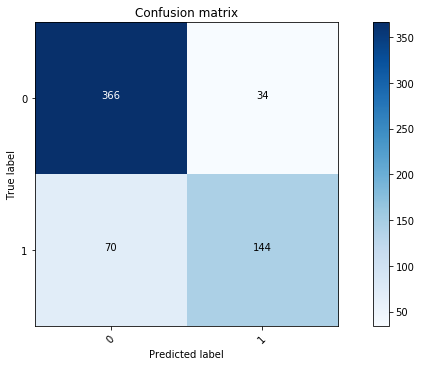

In [42]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_pred)
classes = ['0', '1']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

here need to pick a score - depending on problem look at accuracy, precision, recall, or f1

In [43]:
## How to choose best k value?

[0.7214580834332933, 0.7426096228175396, 0.7214447554311609, 0.7280154604824736, 0.7475276556044248, 0.7312408369985339, 0.7442622950819672, 0.747527655604425, 0.7540583766493403, 0.7605491136878583, 0.7524057043849126, 0.7540317206450753, 0.7442622950819672, 0.749140343862455, 0.7540183926429428, 0.7394109023057445, 0.7426629348260696, 0.7508063441290151, 0.7459149673463947, 0.7410235905637744, 0.7475409836065574, 0.7459149673463948, 0.7491536718645875, 0.7508196721311475, 0.7540717046514727, 0.749193655870985, 0.7540850326536052, 0.7540717046514727, 0.7589497534319606, 0.7540450486472078, 0.7556577369052379, 0.75077968812475, 0.7524190323870452, 0.7475409836065574, 0.747527655604425]


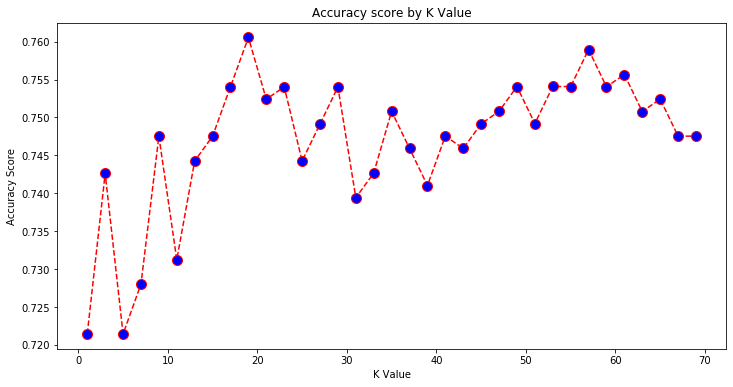

In [44]:
k_range = list(range(1, 70,2))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scaled = cross_validate(knn, 
                           Xscaled_train, 
                           y_train, 
                           cv = 5, 
                           n_jobs= -1,
                           return_train_score= False,
                           return_estimator= False)
    score = cv_scaled['test_score'].mean()
    k_scores.append( score)
print(k_scores)

import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy Score') 
plt.show()

^^^luxury of small dataset, often cannot do this 

[0.7214580834332933, 0.740983606557377, 0.7198187391709981, 0.7296414767426362, 0.7410235905637744, 0.7344928695188592, 0.7442756230840997, 0.749140343862455, 0.7589364254298281, 0.7686791949886713, 0.7703052112488339, 0.7621751299480208, 0.7556710649073705, 0.7524057043849126, 0.757297081167533, 0.7491536718645875, 0.7524323603891776, 0.7524456883913102, 0.7507930161268825, 0.7491669998667201, 0.7491803278688525, 0.7459016393442622, 0.7491803278688525, 0.7540983606557378, 0.7524323603891777, 0.7524456883913102, 0.7524456883913101, 0.7508196721311475, 0.7556843929095028, 0.757297081167533, 0.7524057043849128, 0.7491536718645875, 0.7524190323870452, 0.7540450486472079, 0.7540450486472079]


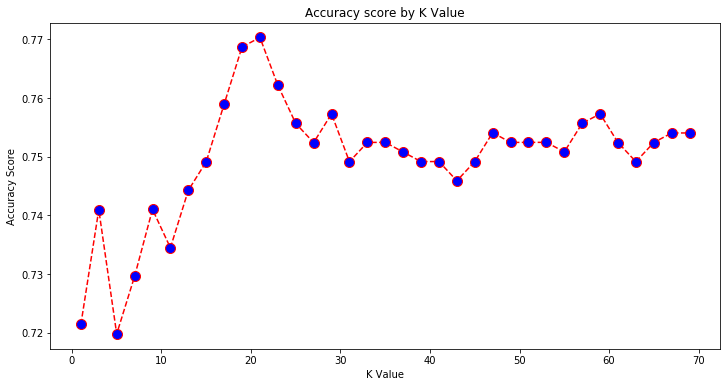

In [45]:
## let's compare these values with weighted version

k_range = list(range(1, 70,2))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights= 'distance')
    cv_scaled = cross_validate(knn, 
                           Xscaled_train, 
                           y_train, 
                           cv = 5, 
                           n_jobs= -1,
                           return_train_score= False,
                           return_estimator= False)
    score = cv_scaled['test_score'].mean()
    k_scores.append( score)
print(k_scores)

import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy Score') 
plt.show()

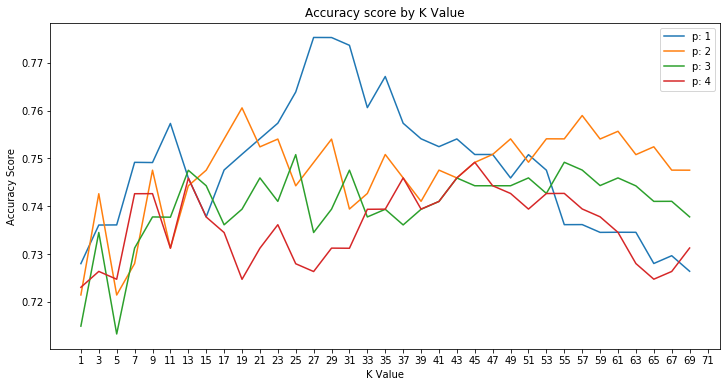

In [46]:
### let's compare these with different metrics
k_range = list(range(1, 70,2))
p_range = range(1,5)

import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))
for p in p_range:
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k, weights= 'uniform', p = p)
        cv_scaled = cross_validate(knn, 
                               Xscaled_train, 
                               y_train, 
                               cv = 5, 
                               n_jobs= -1,
                               return_train_score= False,
                               return_estimator= False)
        score = cv_scaled['test_score'].mean()
        k_scores.append( score)

  
    plt.plot(k_range, k_scores,label= 'p: {}'.format(p))
    plt.title('Accuracy score by K Value')  
    plt.xlabel('K Value')  
    plt.ylabel('Accuracy Score') 
    plt.xticks(range(1,72,2))
    plt.legend()

for different p values you get different accuracy scores for different k values

In [47]:
1 - y_train.sum()/y_train.shape[0]

0.6514657980456027

NOW curious how this performs on Test set

In [48]:
## let's choose  p=1, k=27 and check the test results

Confusion Matrix, without normalization
[[92  8]
 [30 24]]


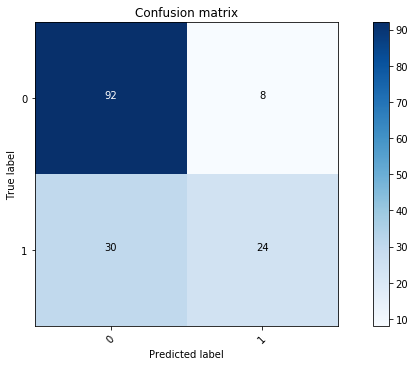

In [49]:
from sklearn.metrics import confusion_matrix

knn_final = KNeighborsClassifier(n_neighbors = 27, p =1, n_jobs= -1)
knn_final.fit(Xscaled_train, y_train)
y_pred = knn_final.predict(Xscaled_test)
cm = confusion_matrix(y_test,y_pred)
classes = ['0', '1']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [50]:
score = (92+24)/(92+24+8+30)
print(score)

0.7532467532467533


in 3/4 cases this model will predict the right class

this model did not see the test set

so if test set is pretty similar to train set, then it predicts 3/4 times

In [71]:
np.random.binomial(1,0.5, size =1)

array([0])